In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
# sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
# pk = Psikit()
pk=Psikit(debug=True,threads=1,memory=12)



  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
# Replace the smiles string for the molecule in the notebook with that for caffeine
# pk.read_from_smiles('OC(=O)c1cnccc1')
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
#pk


"""
This jupyter notebook should be run at 8GB Memory, if the memory is limited"
Then in the next cell  "pk.optimize()" would though an error:
    The kernel appears to have died. It will restart automatically.
"""
pk.optimize()


Optimizer: Optimization complete!


-676.3571175875433

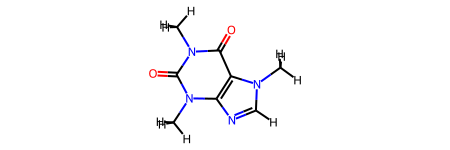

In [5]:
pk.mol


In [6]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20126149  0.07053627  0.08505937 -0.4714062   0.125775   -0.10083329
  0.3640942  -0.49600897 -0.04595382  0.36252497 -0.52858785  0.02500902
  0.00605439 -0.03375563  0.11036593  0.11036593  0.11036593  0.17305151
  0.05004292  0.05004292  0.05004292  0.061492    0.061492    0.061492  ]
[-0.11403961 -0.69387165  0.38640963 -0.62283948  0.63497374  0.09325918
  0.89978889 -0.63014372 -0.87904365  1.09566894 -0.62724378 -0.87749699
 -0.12040857 -0.12349383  0.129732    0.16727755  0.16726885  0.18241273
  0.16750553  0.14895401  0.14892467  0.14560134  0.14560937  0.17519484]
[-0.13210087 -0.05233703  0.0773482  -0.27543934  0.13961199 -0.1254987
  0.29394276 -0.39450039 -0.18830337  0.34847997 -0.39857885 -0.15250973
 -0.13202197 -0.13825366  0.1040491   0.11675936  0.11778373  0.12133833
  0.11931932  0.10841298  0.10770438  0.10710539  0.1059768   0.1217116 ]


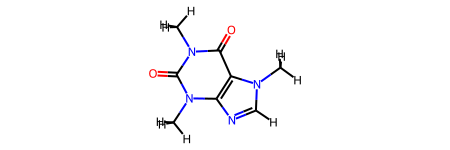

In [7]:
mol = pk.mol
atoms = mol.GetAtoms()
mol

In [8]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [9]:
df = pd.DataFrame(data)

In [10]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.395
8,N,-0.046,-0.879,-0.188
9,C,0.363,1.096,0.348


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
plt.style.use('ggplot')

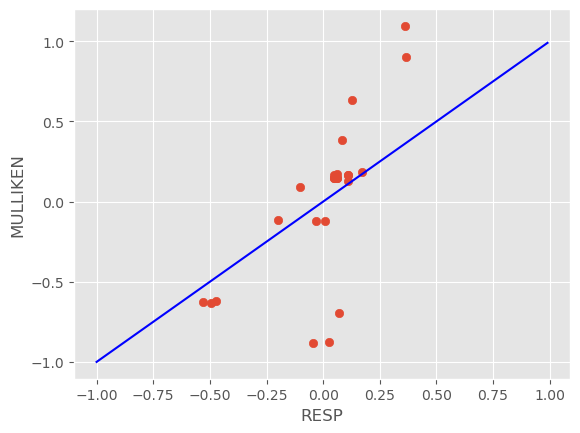

In [13]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

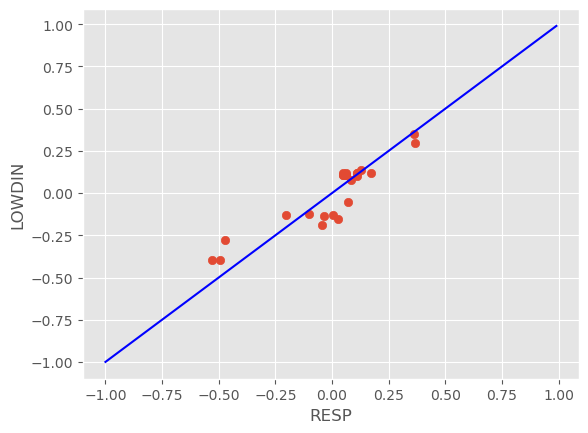

In [14]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

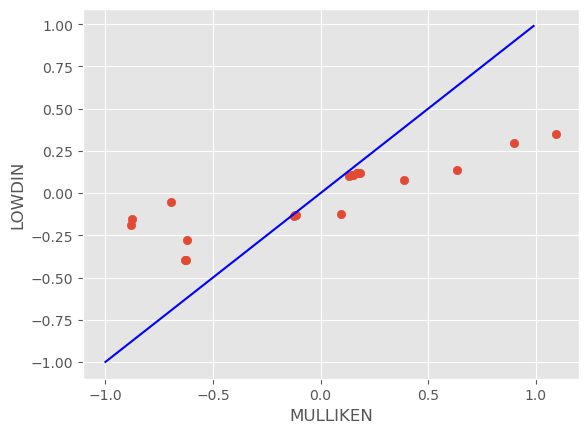

In [15]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

In [16]:

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 300,300


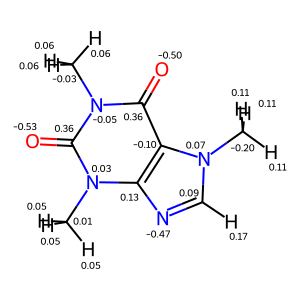

In [17]:

for at in pk.mol.GetAtoms():
    lbl = '%.2f'%(float(at.GetProp("RESP")))
    at.SetProp('atomNote',lbl)
mol
